In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!apt-get install -y python-enchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko python-gobject python-gtk2
  python-wxgtk3.0
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
  python-enchant
0 upgraded, 11 newly installed, 0 to remove and 21 not upgraded.
Need to get 1,354 kB of archives.
After this operation, 5,584 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/ma

In [6]:
# 제일 먼저 tesseract 설치한다
!sudo apt install tesseract-ocr
!pip install pytesseract 
!pip install opencv-python
!pip install imutils
!pip install numpy
!pip install pillow
!pip install nltk
!pip install tensorflow
!pip install PyEnchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
# 필요한 모듈 
import os
import cv2
import pytesseract
from nltk.tokenize import WordPunctTokenizer
import re
import enchant
from google.colab.patches import cv2_imshow
import imutils
%matplotlib inline

In [10]:
# 조건문 추가하기

class OCR3():
  def __init__(self, img):
    self.config = r'--oem 3 --psm 3 -c preserve_interword_spaces=1'
    if img.shape[1] < 500:
      self.image = cv2.cvtColor(imutils.resize(img, width=400), cv2.COLOR_BGR2GRAY)
    else:
      self.image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(self.image)
    self.result = ''
    self.filter_math = '[^A-Za-z0-9+-/*÷=×±∓∘∙∩∪≅∀√%∄∃θπσ≠<>≤≥≡∼≈≢∝≪≫∈∋∉⊂⊃⊆⊇⋈∑∫∏∞x]'
    self.language = enchant.Dict("en_US")

  def image_pytesseract(self):
    if not self.text_filtering():
      print("\ntwice text_filtering")
     
      blur =  cv2.GaussianBlur(self.image, (5,5), 0)
      self.image = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
      cv2_imshow(self.image)
      self.text_filtering()

  def text_filtering(self):
    self.result = WordPunctTokenizer().tokenize(pytesseract.image_to_string(self.image, lang='eng', config=self.config))
    print("Original Nltk tokenizer Before : ",self.result)
    self.result = [re.sub(self.filter_math, '', i).lower() for i in self.result if re.sub(self.filter_math, '', i) != '']
    print("After Nltk tokenizer, filtering : ", self.result)
    
    if len(self.result) <= 3: 
      print("False\n")
      return False
    else:
      Ncount = 0
      Ccount = 0
      Tcount = 0
      Fcount = 0
      for i in self.result:
        if i.isdigit(): #숫자
          print("this is num: ",i)
          Ncount += 1
        else: #숫자 외 -> 연산자 or 영어 단어
          if i in '+-/*÷=×±∓∘∙∩∪≅∀√%∄∃θπσ≠<>≤≥≡∼≈≢∝≪≫∈∋∉⊂⊃⊆⊇⋈∑∫∏∞x,.()':
            print("this is math operations : ", i, end="\n")
            Ccount += 1
          else:
            temp1, temp2 = [idx for idx in range(len(i)) if i[idx].isdigit()], [idx for idx in range(len(i)) if i[idx] in '+-/*÷=×±∓∘∙∩∪≅∀√%∄∃θπσ≠<>≤≥≡∼≈≢∝≪≫∈∋∉⊂⊃⊆⊇⋈∑∫∏∞x,.()']
            print("this is character : ", i,self.language.check(i),end="\n")
            if temp1 or temp2:
              Ncount += len(temp1)
              Ccount += len(temp2)
            else:
              if self.language.check(i): Tcount += 1
              else: Fcount += 1
      print("\ncount: ", Ncount)
      print("Ccount: ",Ccount)
      print("Tcount: ",Tcount)
      print("Fcount: ",Fcount)
      
      if ((Ccount + Ncount < Tcount + Fcount) and (Tcount <= Fcount)) or ((Tcount + Fcount >= 15) and (abs(Tcount - Fcount) <= 3)): # false일 경우 | (Ccount + Ncount + Tcount < 6) or 
        print("False")
        return False
      else:
        print("True")
        return True


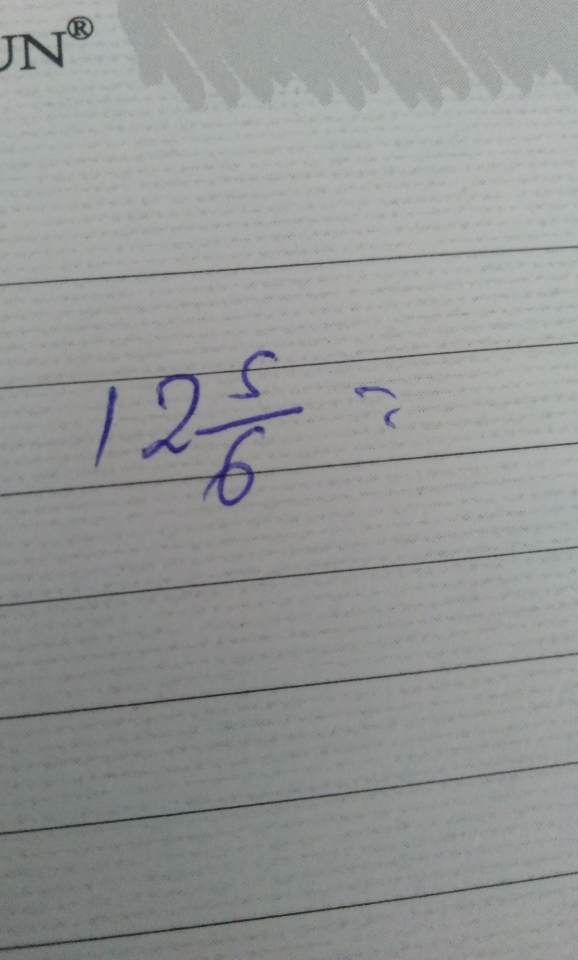

None:  []


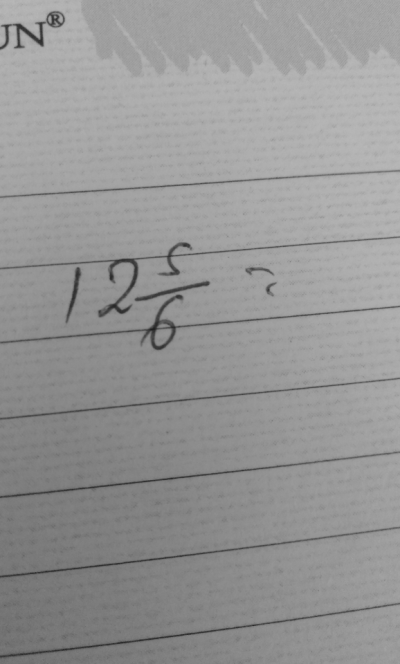

gray + resize:  []


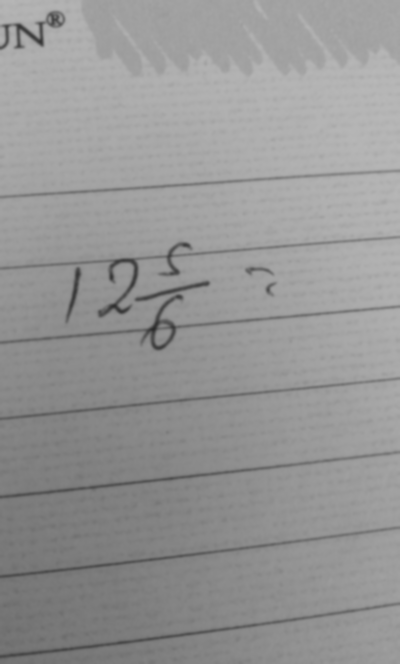

blur + gray + resize:  []


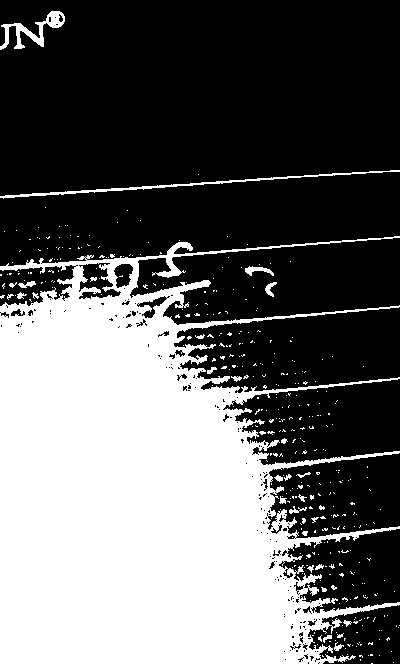

threshold + gray + resize:  []


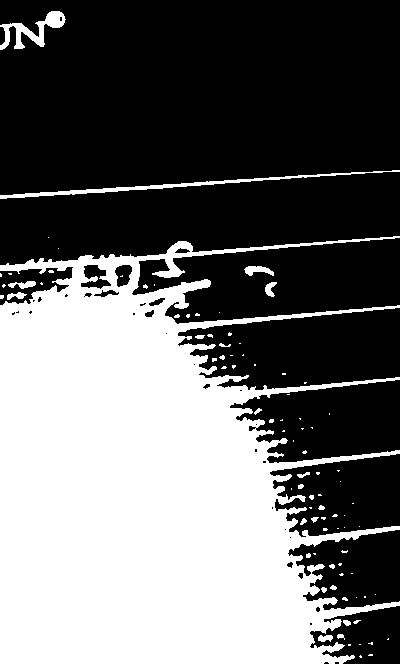

blur + threshold + gray + resize:  []


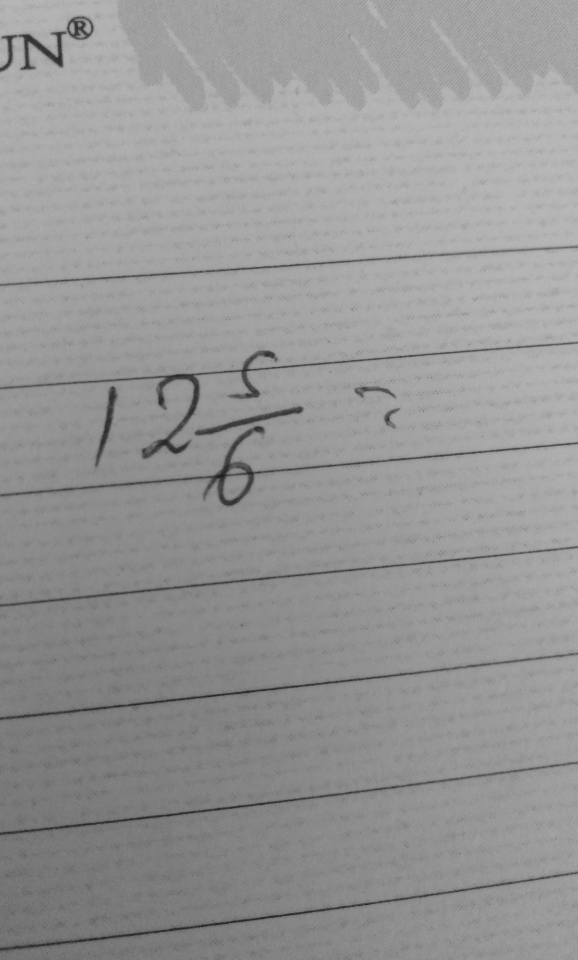

gray:  []


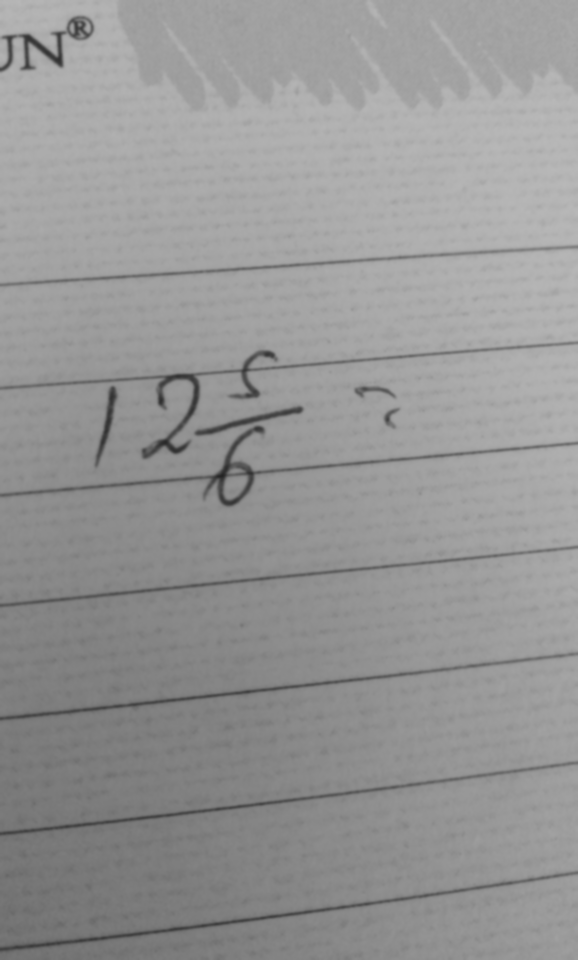

gray + blur:  []


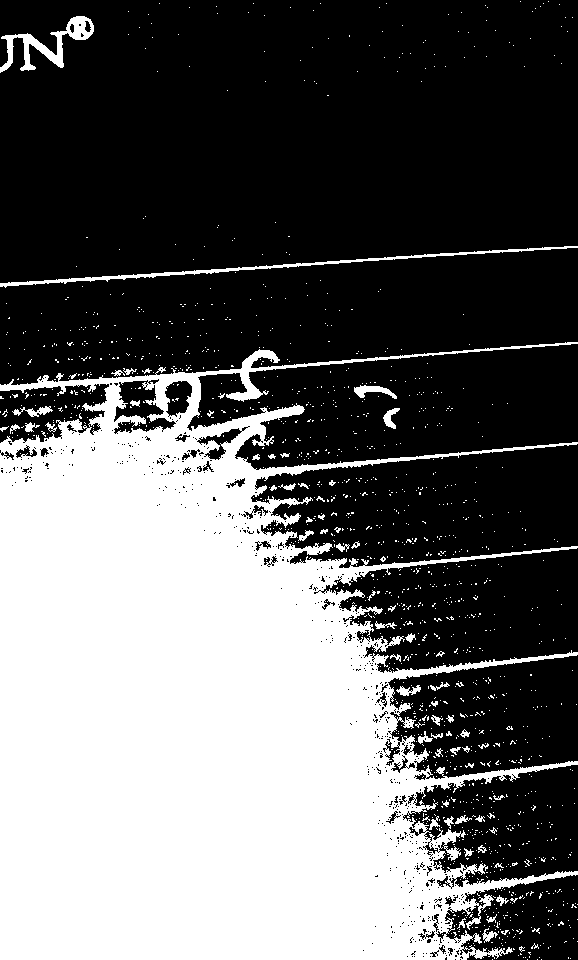

threshold + gray + resize:  []


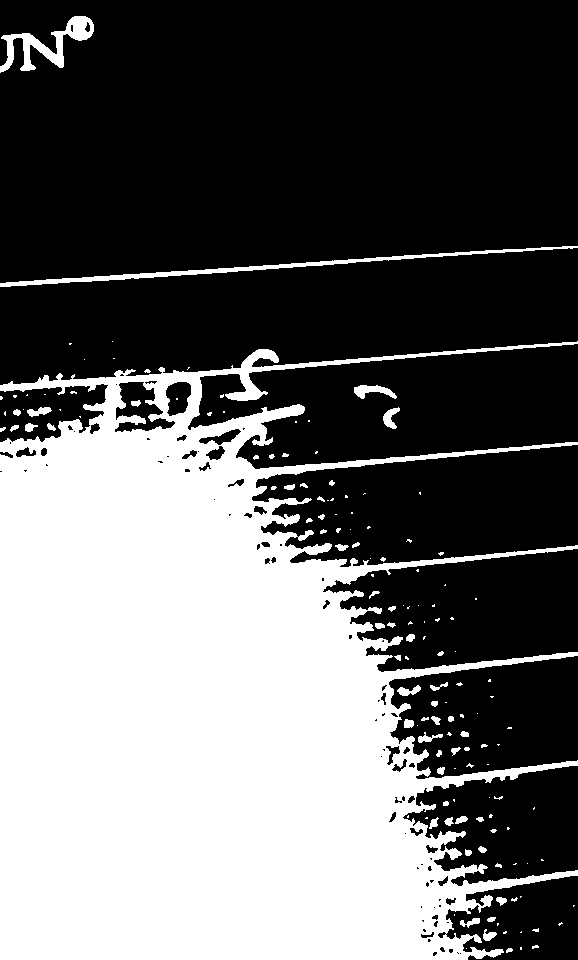

gray + blur + threshold:  []


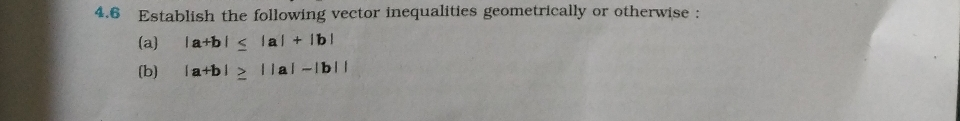

None:  ['4', '.', '6', 'Establish', 'the', 'following', 'vector', 'inequalities', 'geometrically', 'or', 'otherwise', ':', '(', 'a', ')', 'latbi', '<', 'Jal', '+', 'Ibl', ':', '(', 'b', ')', 'latbi', '>', 'Iai', '~', 'IbI', '!']


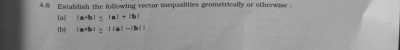

gray + resize:  []


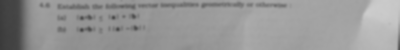

blur + gray + resize:  []


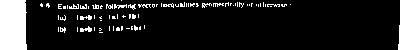

threshold + gray + resize:  []


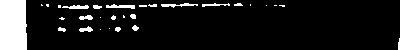

blur + threshold + gray + resize:  []


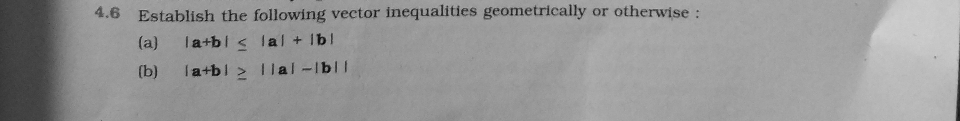

gray:  ['4', '.', '6', 'Establish', 'the', 'following', 'vector', 'inequalities', 'geometrically', 'or', 'otherwise', ':', '(', 'a', ')', 'latbl', '<', 'Jal', '+', '1b', '!', '(', 'b', ')', '(', 'atbi', '>', '[', 'Jal', '~', 'IbI', '!']


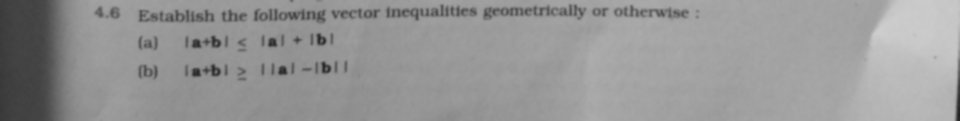

gray + blur:  ['4', '.', '6', 'Establish', 'the', 'following', 'vector', 'inequalities', 'geometrically', 'or', 'otherwise', '(', 'a', ')', 'tarbi', '<', 'tal', '+', 'ib', '!', '(', 'b', ')', 'tarbi', '>', 'bil']


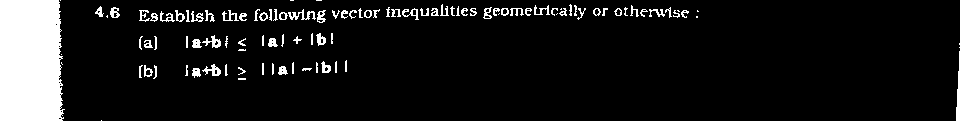

threshold + gray + resize:  ['4', '.', '6', 'Establish', 'the', 'following', 'vector', 'mequalities', 'geometrically', 'or', 'otherwise', ':', 'et', 'Tee', 'ead', 'omer', 'eee', 'ee']


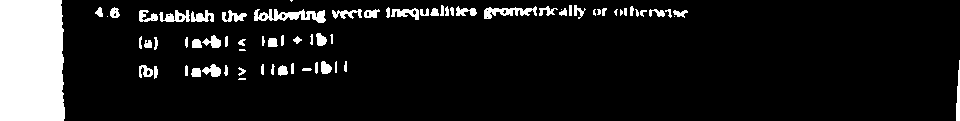

gray + blur + threshold:  ['4', '.', '6', 'Establish', 'the', 'following', 'vector', 'inequalities', 'geometrically', 'of', 'othcrwine', 'CMD', 'Ue', '[', 'te', 'ed', 'io']


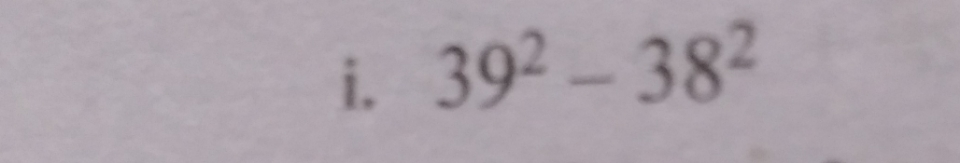

None:  ['i', '.', '397', '-', '387']


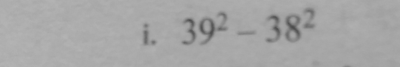

gray + resize:  ['i', '39', '°', '-', '38', '?']


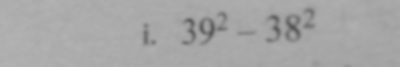

blur + gray + resize:  ['i', '.', '39', '°', '-', '38', '?']


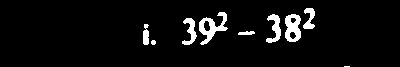

threshold + gray + resize:  ['FA', 'oe']


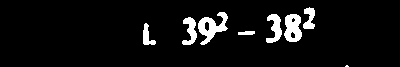

blur + threshold + gray + resize:  ['i', '397', '-', '38', '?']


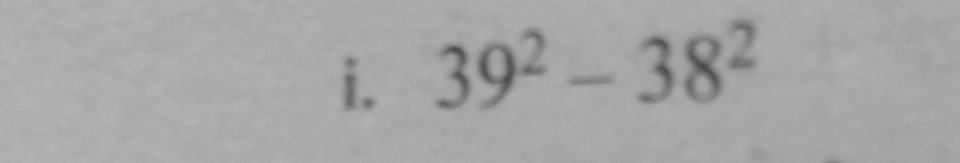

gray:  ['i', '39', '°-', '38', '?']


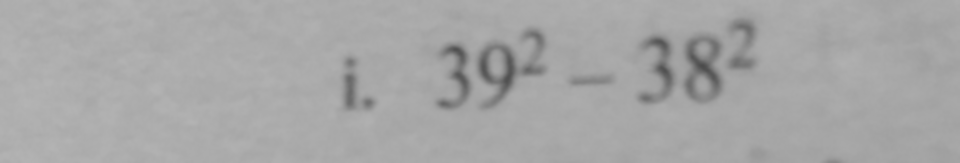

gray + blur:  ['i', '39', '°', '—', '38', '?']


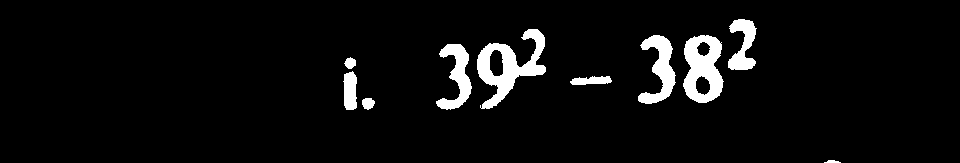

threshold + gray + resize:  ['RS', 'eek', 'Se']


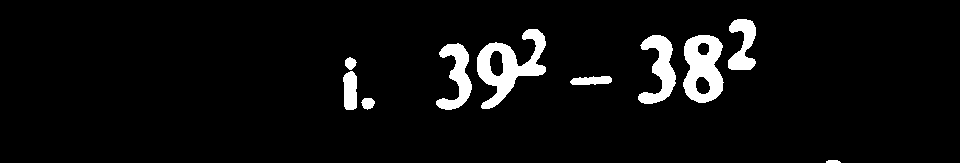

gray + blur + threshold:  ['Te', 'KS']


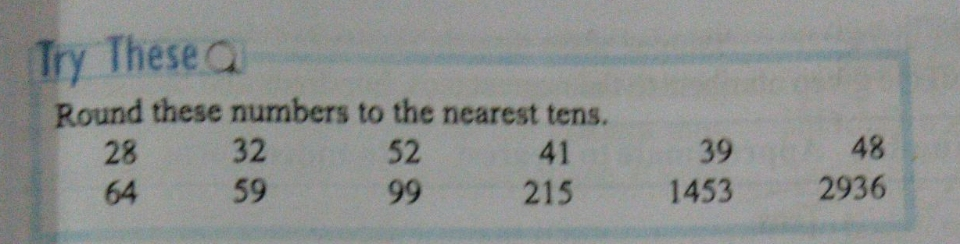

None:  ['these', 'numbers', 'to', 'the', 'nearest', 'tens', '.', '28', '32', '52', '41', '39', '48', '64', '59', '99', '21', '1453', '-', '2936', 'hasten', 'pe', 'AS', 'Theseq', 'ae', 'Gs', 'se', 'oka', 'ek', 'aes', 'me', 'oo', 'erciornanenl', '"|', '+', 'a', 'Q', 'ae', 'Ra', 'DIRE', 'EG', 'RI', 'aa', 'ES']


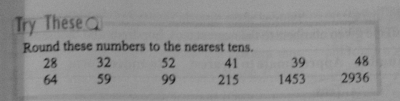

gray + resize:  ['These', ')', 'these', 'numbers', 'to', 'the', 'nearest', 'tens', '.', 'es', ')', '52', '41', '39', '48', 'Oe', '”', '25', '1453', '-', '2936']


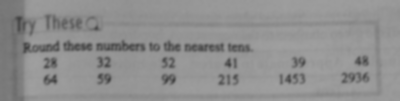

blur + gray + resize:  ['“', 'a', '#', '”', '2s', '»”', '1433', '“', '2']


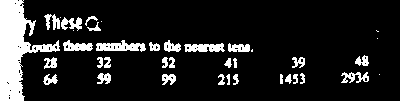

threshold + gray + resize:  ['These', 'ee', 'mw', 'cr', 'oF', 'Ee', ')', 'oy', 'ae', ')', 'EF', 'rary', 'erred']


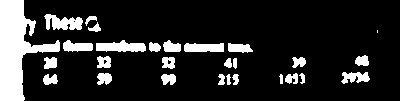

blur + threshold + gray + resize:  ['ed', 'oo', 'Pity', '»', 'os', ')', 'a', 'Bad']


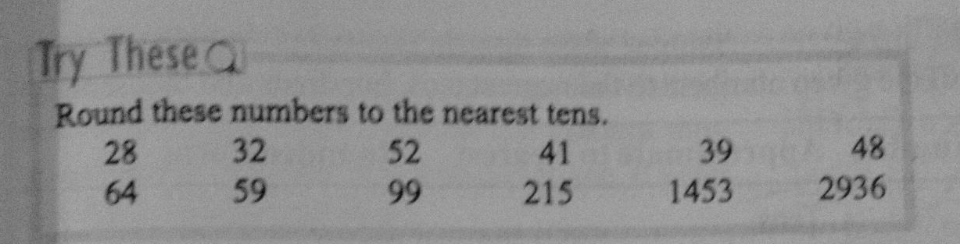

gray:  ['52', 'Mee', '48', '9', '-', '2', '1453', 'a936', '%']


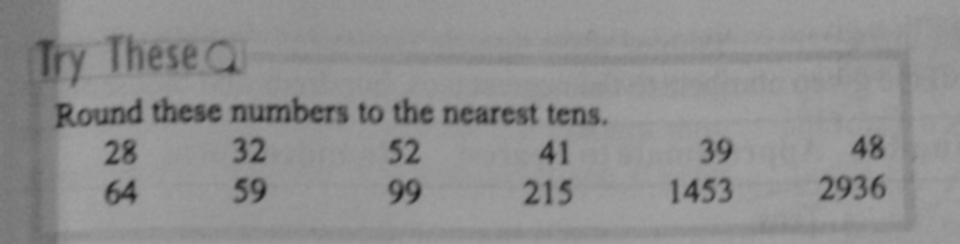

gray + blur:  ['These', 'these', 'numbers', 'to', 'the', 'nearest', 'tens', '.', '28', '32', '52', '4', '\\', '9', '48', 'ad', '59', '9', '”', '215', '1453', '2936']


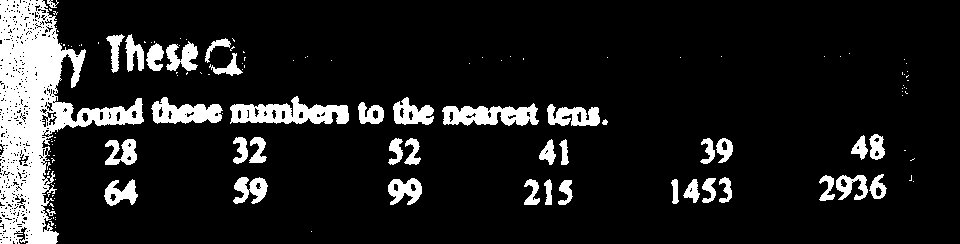

threshold + gray + resize:  ['52', 'nr', '.', '48', 'nt', ')', 'ann', 'Se', 'oe']


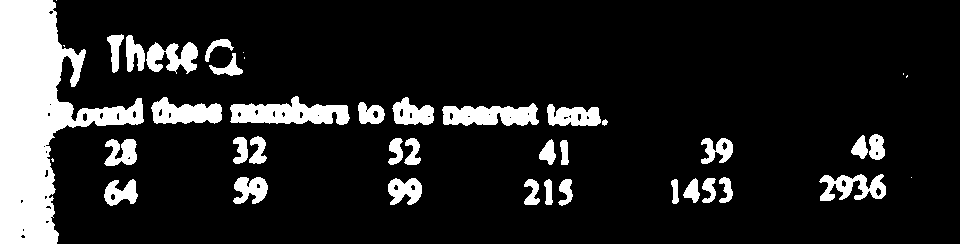

gray + blur + threshold:  ['Lr', ':', 'Let', 'these', 'numbers', 'to', 'the', 'nearest', 'tens', '.', 'ye', '}', 'Ry', 'Ly', ')', '4', 'ke', 'oi', '“', '4', 'be', ']', '9', 'rab', ')', '1453', 'Paks', '.)']


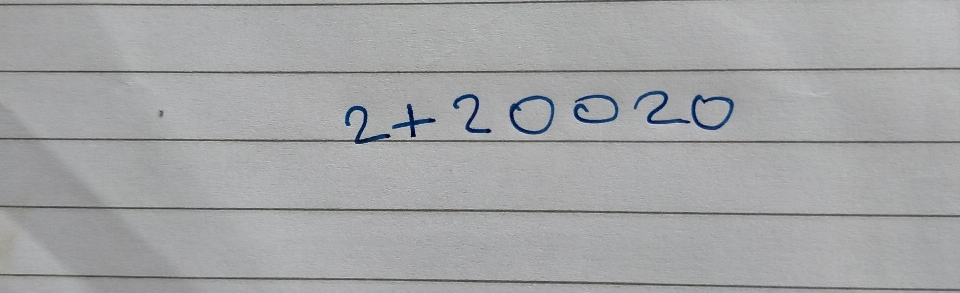

None:  ['Q4', '+', '2LO0O', '?', 'CO']


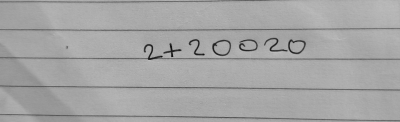

gray + resize:  ['.', '2', '+', '2LOS2O']


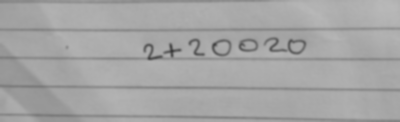

blur + gray + resize:  ['ee']


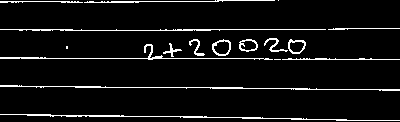

threshold + gray + resize:  [';', 'Ie', 'LOOZD']


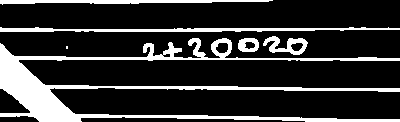

blur + threshold + gray + resize:  ['=']


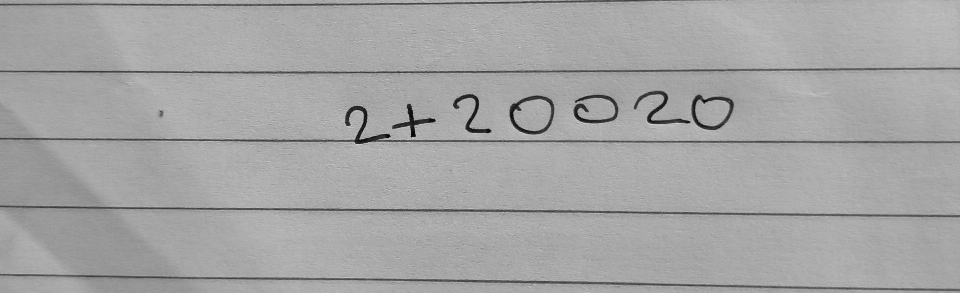

gray:  ['Ee', 'lore']


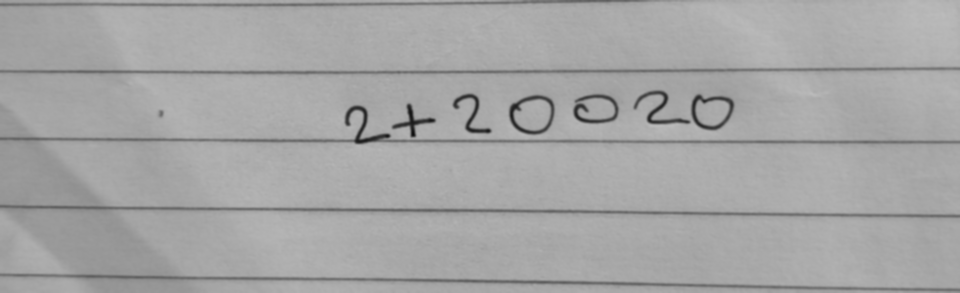

gray + blur:  ['9', '+', 'LOO2CO']


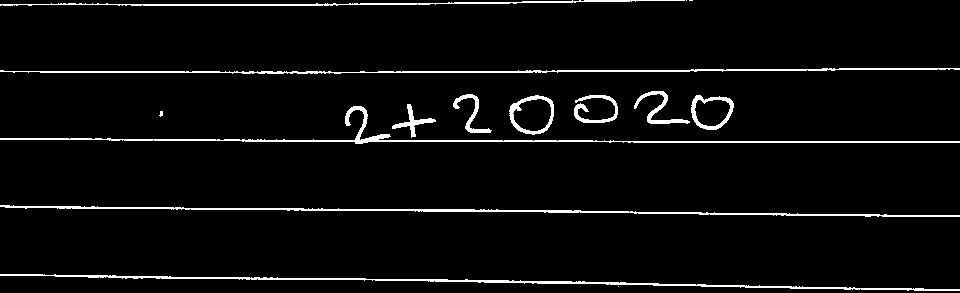

threshold + gray + resize:  ['Pee', 'mol', '=', 'Icxe', ',']


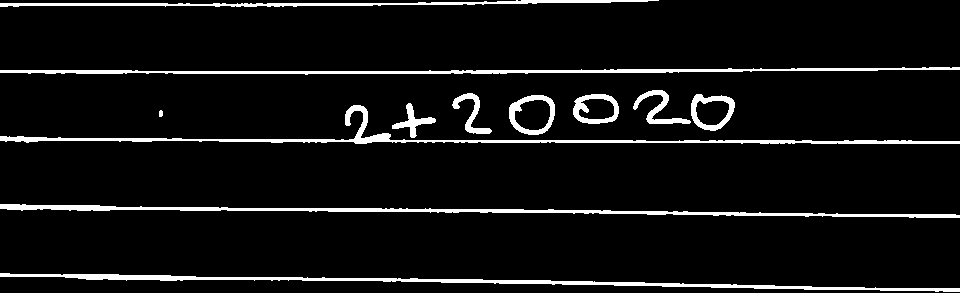

gray + blur + threshold:  ['De', 'oe', 'ORAS', ')']


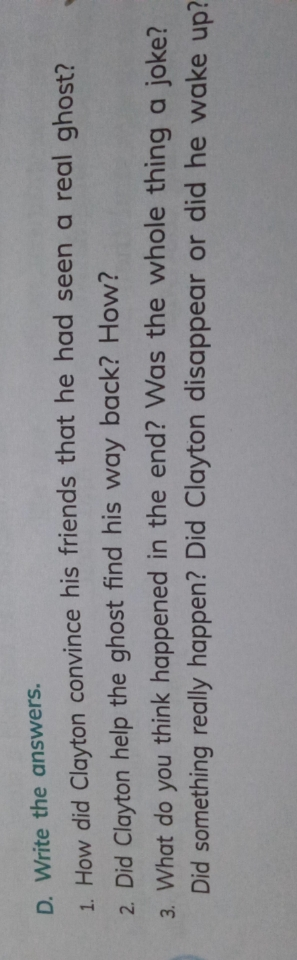

None:  ['idn', 'SyDM', 'ay', 'PIP', 'Jo', 'upaddpsip', 'uozd', '|', 'D', 'pig', '{', 'uaddoy', 'Ajjpa1', 'Buiyjewos', 'pig', 'jax0', '[', 'D', 'Buiuy', 'ajoum', 'ayy', 'sop', 'Zpue', 'ay', '}', 'u', '!', 'pauaddoy', 'yuIy', ')', 'NOA', 'op', 'YUM', '€', 'iMoH', '220g', 'Aom', 'siy', 'puy', 'ysoyb', 'ay', 'djay', 'uoynjD', 'pid', 'Zz', 'QUIAUO', '?', 'UO', '}', 'ADID', 'PIP', 'MOH', 'T', ':', 'soy', 'joa', 'p', 'uses', 'poy', 'ay', 'DY', '}', 'SpuaH', '}', 'SIY', '2', 'ssuamsub', '24', 'aM', '‘', 'CO']


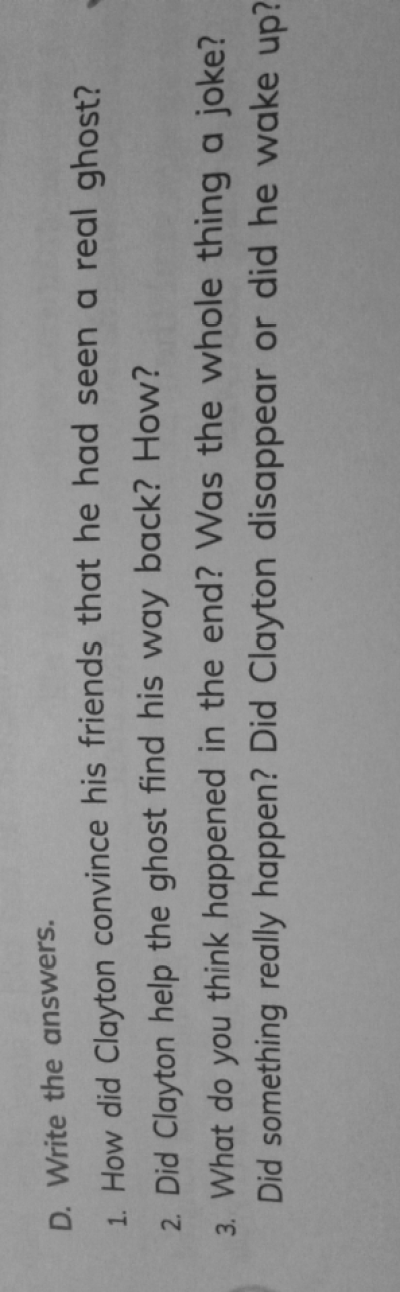

gray + resize:  ['idn', 'a0', 'sy', 'PIP', '10', 'IDaddosip', 'uoyn', '|', 'D', 'pig', 'uaddoy', 'Ajjoas', 'Buryewos', 'PIC', 'Zayol', 'D', 'Buiyy', 'ajoym', 'ayy', 'spp', ',', '{', 'pue', 'ayy', 'ul', 'pauaddoy', 'yUIY3', 'NOA', 'op', '04M', '{', 'MOH', '20q', 'AOM', 'siy', 'PUY', 'soY6', 'ayy', 'djay', 'UorDID', 'PIC', '@', '9', 'uo', '}', 'AD', '|', 'D', 'PIP', 'MOH', 'T', '.', 'Qsoy6', 'pai', 'D', 'uaas', 'poy', 'sy', '}', 'OY4', '}', 'spuali', '}', 'SIY', 'QDUIAUO', ':', '“', 'sia', '@', 'msud', '243', 'BM', '“']


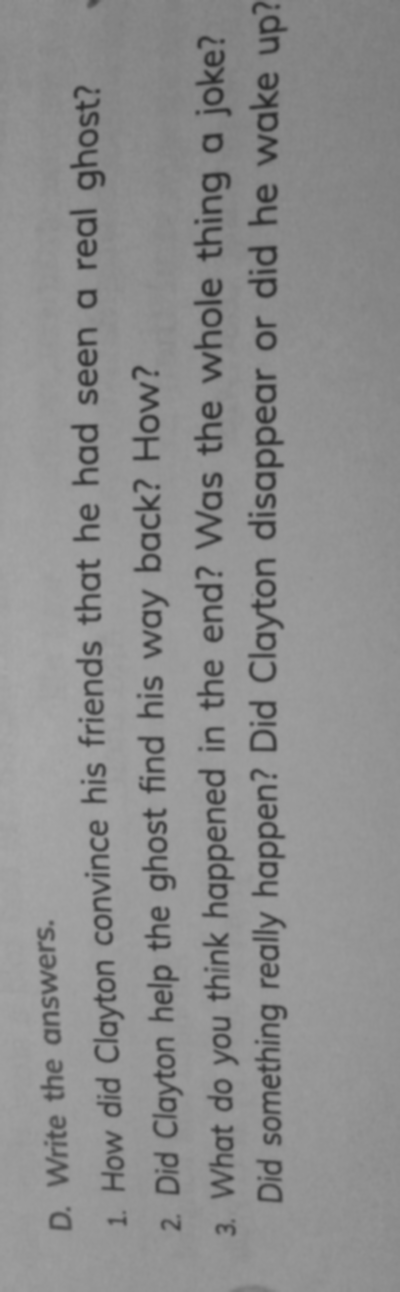

blur + gray + resize:  ['idn', 'SyDM', 'sy', 'Pip', 'Jo', 'upaddosip', 'uojd', '}', 'D', 'pig', '{', 'ueddpy', 'Ajjpai', 'Guiyjawos', 'pig', '~', 'ayof', 'D', 'Buiuy', 'ajoum', 'au', '}', 'sof', ',', 'Zpue', 'ayy', 'u', '!', 'pauaddoy', 'yuUIYr', 'nof', 'op', '}', 'oYyM', '€', '{', 'MOH', '220g', 'ADM', 'siy', 'PUY', 'SOYG', 'ayy', 'djay', 'UOLADID', 'PID', '%', 'Qsoy6', 'joa', 'D', 'uaas', 'poy', 'ay', 'yDY', '}', 'spUaLy', 'SIy', 'aDU', '!', 'AUC', '?', 'uoyADjD', 'pip', 'MOH', 'T', '“', 'ssamsuD', 'ayy', 'AWM', '.']


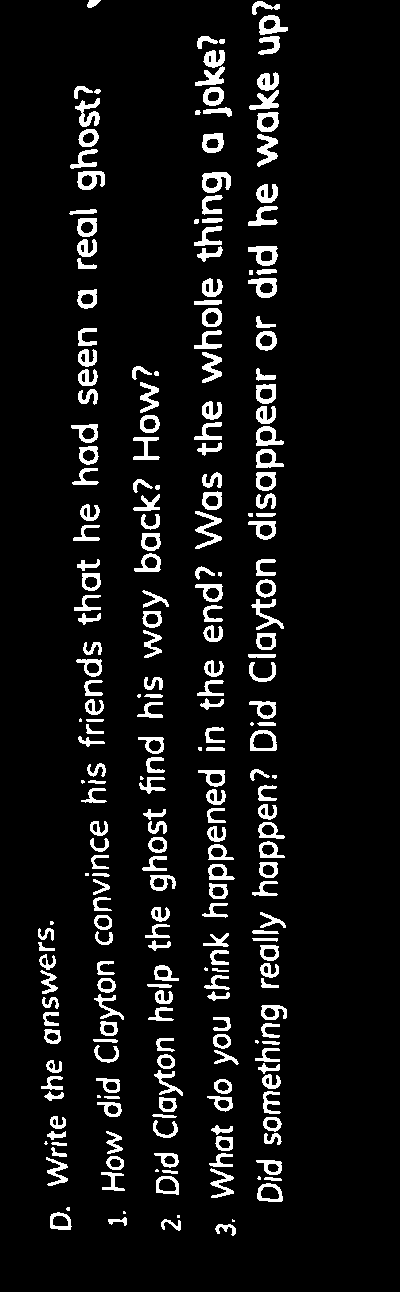

threshold + gray + resize:  ['el', 'Le', 'Te', 'Selo', 'ele', ']', 'oes', 'aC', ')', '6', 'Beeler', 'eRe', '>', 'To', ')', 'Mek', 'SUTURE', '[', 'ol', 'AMET', 'ME', 'Tey', 'Wd', 'Le', 'Uo', 'e', 'R', 'A', 'MS', 'el', ':', 'BS', 'nee', 'ae', 'Ra', 'ce', 'Seto', '0', 'aed', ',', 'Pa', '\\', 'so0', 'lod', 'oS', 'oMEL', 'LL', 'Molole', 'MCI', 'Lele', 'Meee', 'Eo', 'QDUIAUO', ':', 'Ie', 'a', 'hie']


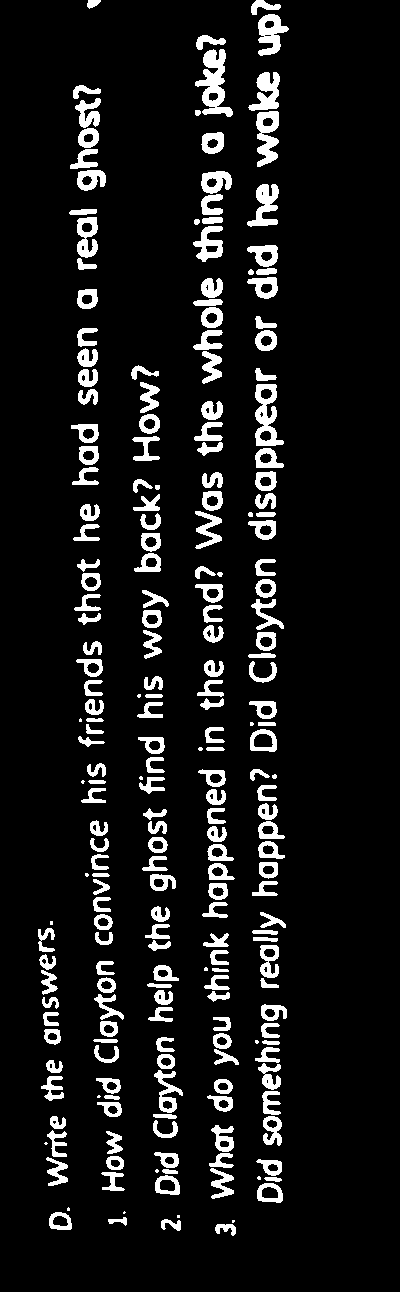

blur + threshold + gray + resize:  ['Ke', 'TB', 'sy', ']', 'MB', 'Ce', 'MB', 'eve', 'lelert', 'eV', '(', 'eM', 'amar', 't', 'MA', 'mec', 'oem', '6', ')', 'ae', 'ar', 'ea', 'wd', 'eC', 'RMU', 'Ceci', 'lin', 'eye', ')', 'ee', 'ty', 'FSS', 'CRS', 'ee', 'eh', 'Ra', 'Phere', 'Mao', 'SUE', 'OUTS', 'oloF', 'REVI', 'LLP', ')', 'Moe', 'alae', 'uoyAo', '|)', 'pip', 'MOH', 'T', 'Pee', 'CT', 'mee', 'a', ')', 'ome', '.']


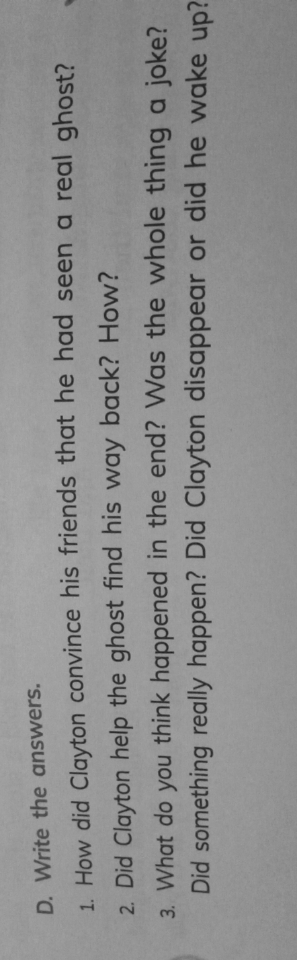

gray:  ['=', 'SDM', 'By', 'Pip', 'Jo', 'speddpsip', 'uooj', '|', 'D', 'pig', 'juaddoy', 'Ajjpa1', 'Buiyjyawos', 'pig', 'ayof', 'D', 'Bulyy', 'ajoum', 'auy', 'sop', 'Zpua', 'ay', '}', 'u', '!', 'pauaddpy', 'yUIYr', 'nok', 'op', '‘', 'uM', '€', '{', 'MOH', '220g', 'Aom', 'siy', 'puy', '3soy6', 'ay', '?', 'dey', 'uoyn', '|', 'D', 'pid', 'Z', 'QuIAUOD', 'UO', '}', 'AD', '|', 'D', 'PIP', 'MOH', 'T', ';', '-', 'sou6', 'joa1', 'p', 'uses', 'poy', 'ay', '30y', '}', 'spuali', '}', 'SIY', '2', '“', 'siamsuD', 'ay', '}', 'aM']


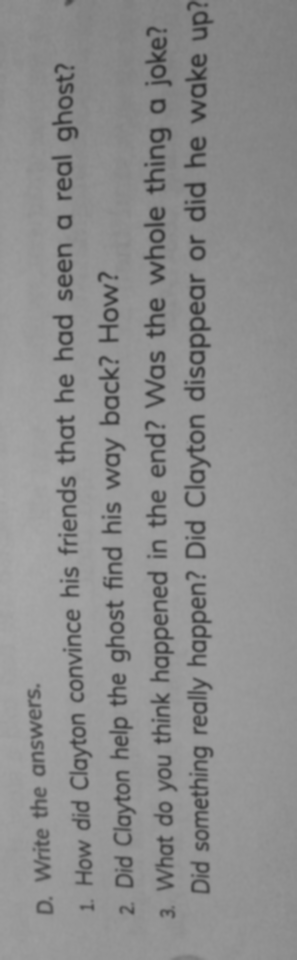

gray + blur:  ['idn', '840M', 'ay', 'Pip', 'Jo', 'spaddosip', 'uoyd', '|', 'D', 'pig', '{', 'uaddoy', 'A', '\\', 'joa1', 'Bunjawos', 'pig', 'Zayol', 'O', 'Buiyy', 'ajoum', 'auy', 'so', ',', 'zpua', 'ayy', 'u', '!', 'pauaddoy', 'yuIYyy', 'NOA', 'op', '304M', 'E', '{', 'MOH', '@', 'PDg', 'AOM', 'siy', 'Puy', 'ySOY6', 'ayy', 'djay', 'UOX', '*', 'O', '!', 'D', 'PID', '@', '.', 'QSOY6', 'joa', '!', 'D', 'Uaas', 'POY', 'ay', '3OU', ')', 'SpUALY', 'sy', 'adUIAUOD', 'UOHADID', 'PIP', 'MoH', 'T', '“', 'ssamsud', 'ay', 'BUM', 'OC']


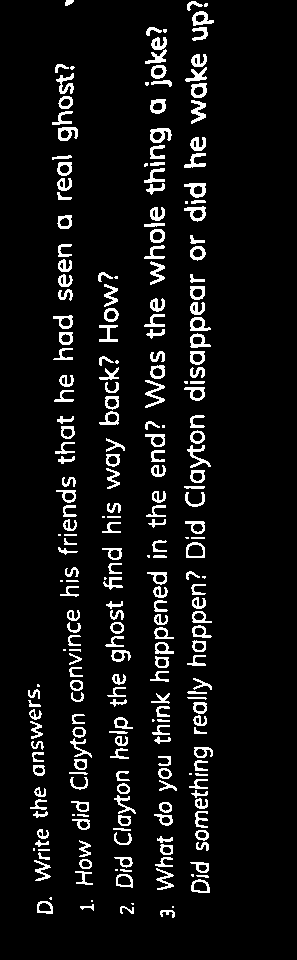

threshold + gray + resize:  ['a', 'aYOM', 'By', 'Pip', 'Jo', 'sDaddpsip', 'uoyo', ')', 'D', 'pig', 'Zuaddpy', 'Ajoas', 'Buiyjawos', 'pig', 'Fe', ')', 'olen', 's', ']', 'el', 'Ura', ')', '(', 'ele', 'WE', '-', 'LEP', '1', '°)', 'Wd', 'PPP', 'ocelot', 'cy', 'ay', 'op', 'Pn', '€', 'eR', 'We', 'E', 'eel', 'co', 'Toren', 'end', 'ST', 'Uloe', 'mC', 'aioe', 'aL', 'ae', ',', 'F', 'sSoyuB', 'joas', 'p', 'uvas', 'poy', 'ay', '3OUy', 'spual', 'Sly', '>', 'Pe', 'Amn']


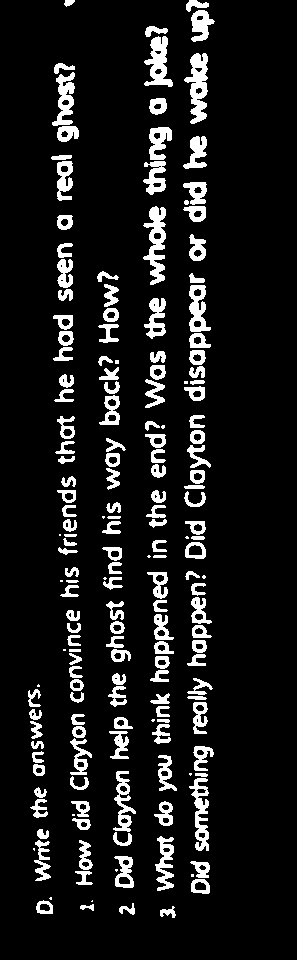

gray + blur + threshold:  ['Te', 'ee', 'eer', 'Mee', 'Mem', 'maa', ']', 'eR', 'Oe', 'Ta', 'VL', 'OOM', 'UC', 'i', 'Mi', 'ea', 'does', 'Ag', 'Pee', 'ee', 'CN', 'BU', 'kes', 'na', 'Se', 'Re', 'eT', 'tC', 'ca', 'dae', 'Ca', '!', 'Par', 'ee', 'eae']


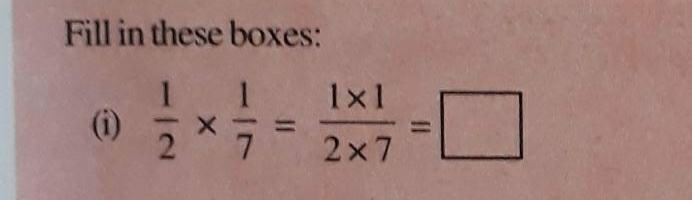

None:  ['Fillin', 'these', 'boxes', ':']


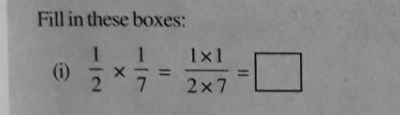

gray + resize:  ['Fillin', 'these', 'boxes', ':', 'ea', '.', 'Lx', 'Qas', '5', 'on', '-']


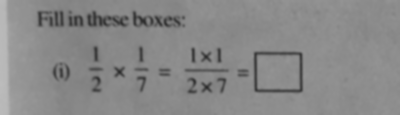

blur + gray + resize:  ['Fill', 'in', 'these', 'boxes', ':', 'ad', 'ut', '®', '3', '*', '7', '"', '20', '°', 'L', ']']


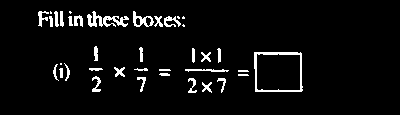

threshold + gray + resize:  ['econ', 'eee', '©', '35', '>', 'nat']


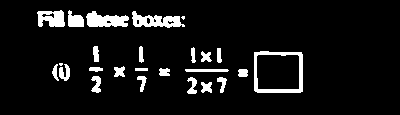

blur + threshold + gray + resize:  ['Dw', 'eee', 'Ot', 'here']


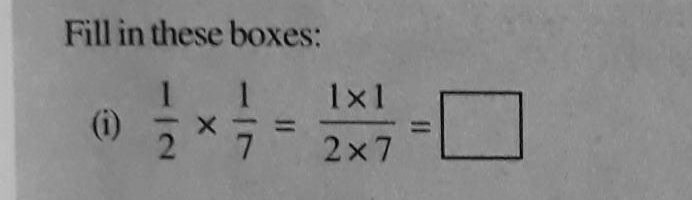

gray:  ['Fillin', 'these', 'boxes', ':']


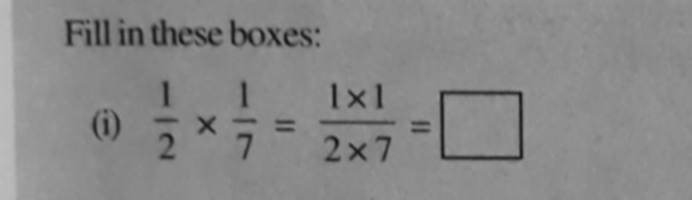

gray + blur:  ['Fillin', 'these', 'boxes', ':', 'meet', ',', 'oan', '5', '“', 'pel']


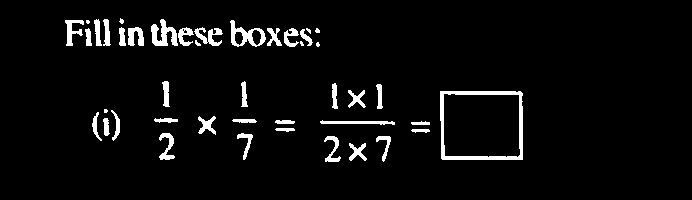

threshold + gray + resize:  ['Fill', 'in', 'these', 'boxes', ':']


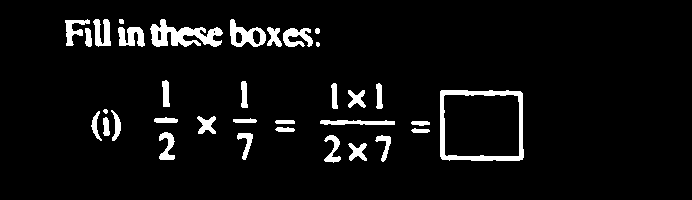

gray + blur + threshold:  ['SE', 'Sad', 'ney', 'w', 'reece', '®', '3', '*', '7', '*', 'il', 'a']


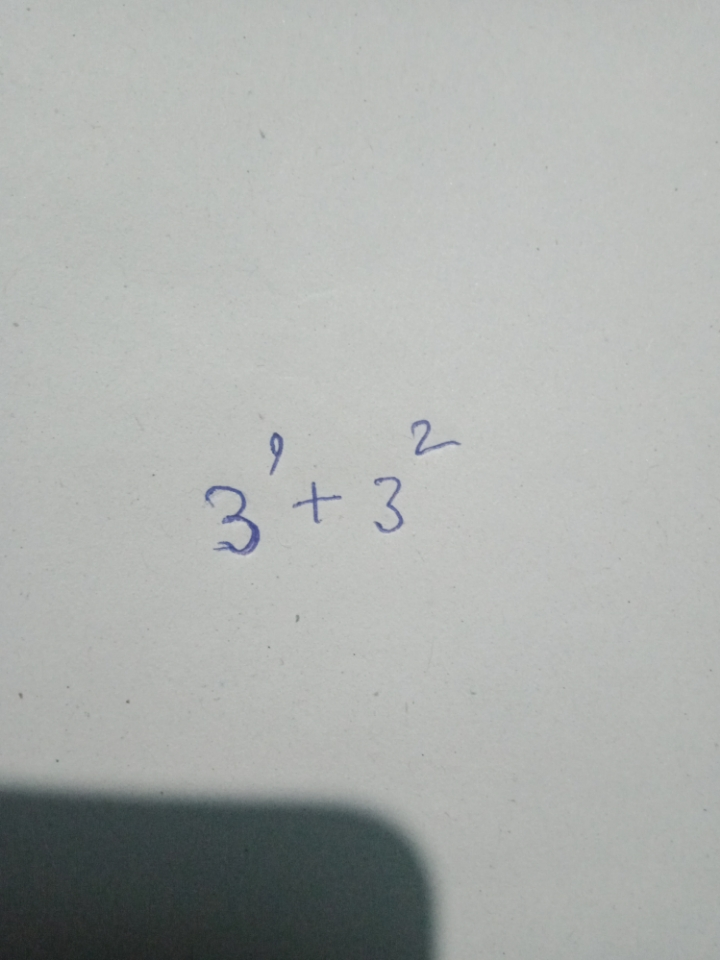

None:  ['Q', '+', '3', '=']


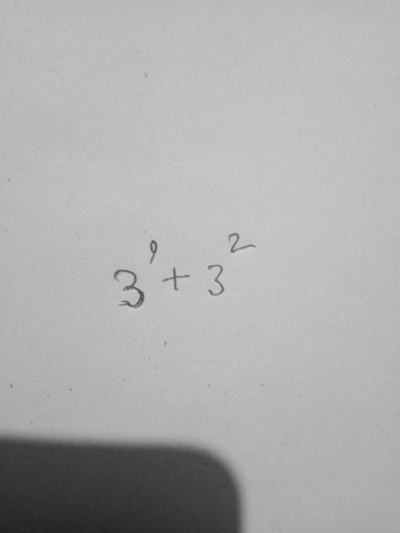

gray + resize:  []


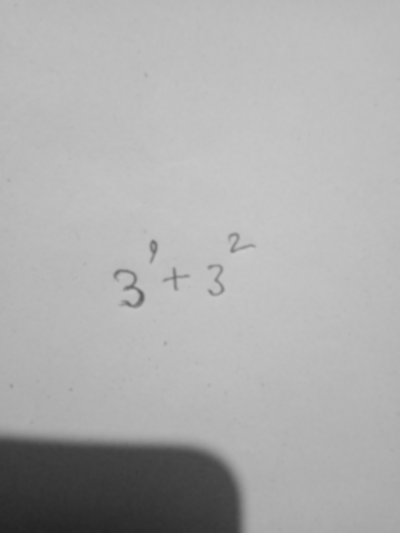

blur + gray + resize:  []


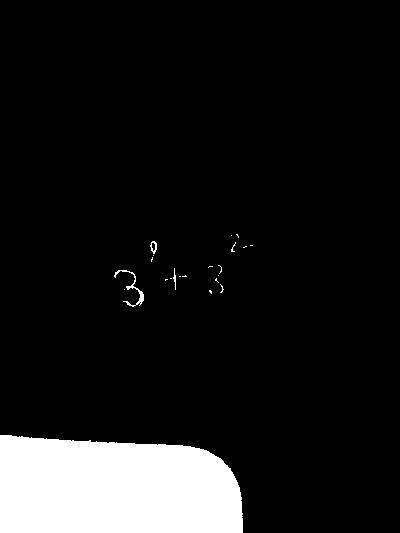

threshold + gray + resize:  []


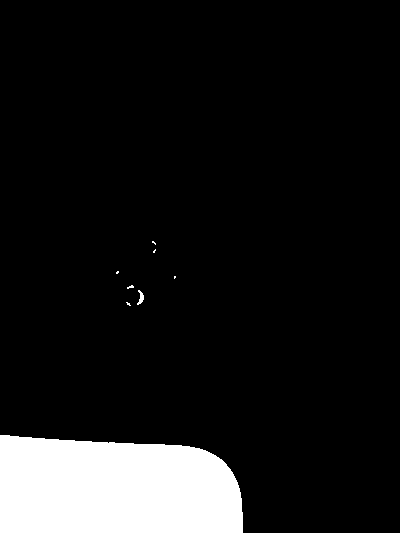

blur + threshold + gray + resize:  []


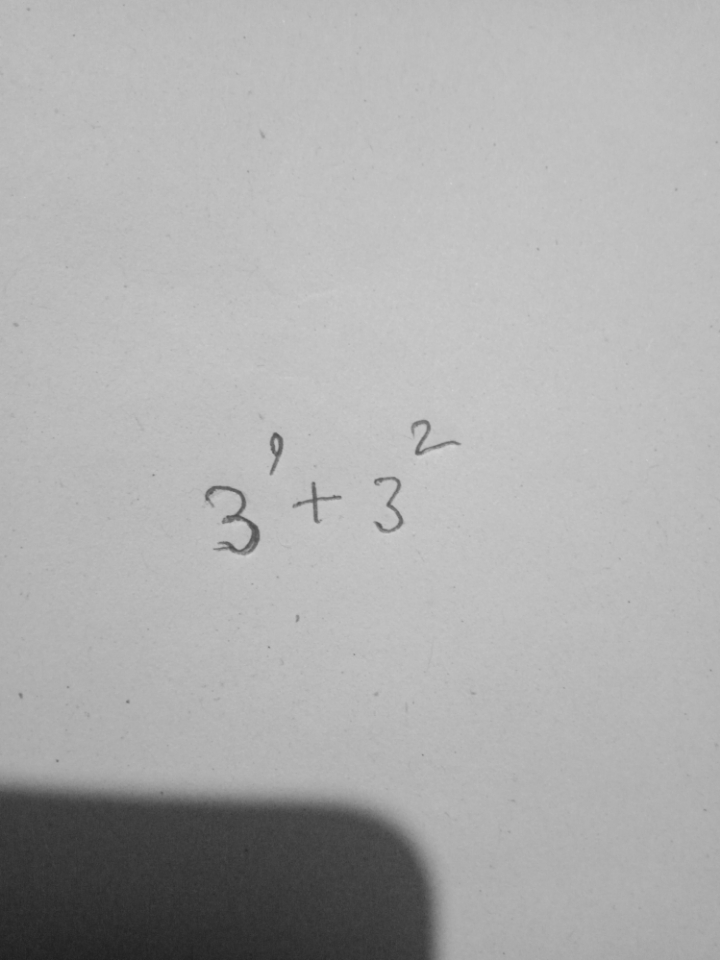

gray:  ['~', 'w', '\\', 'Q', '+', '3']


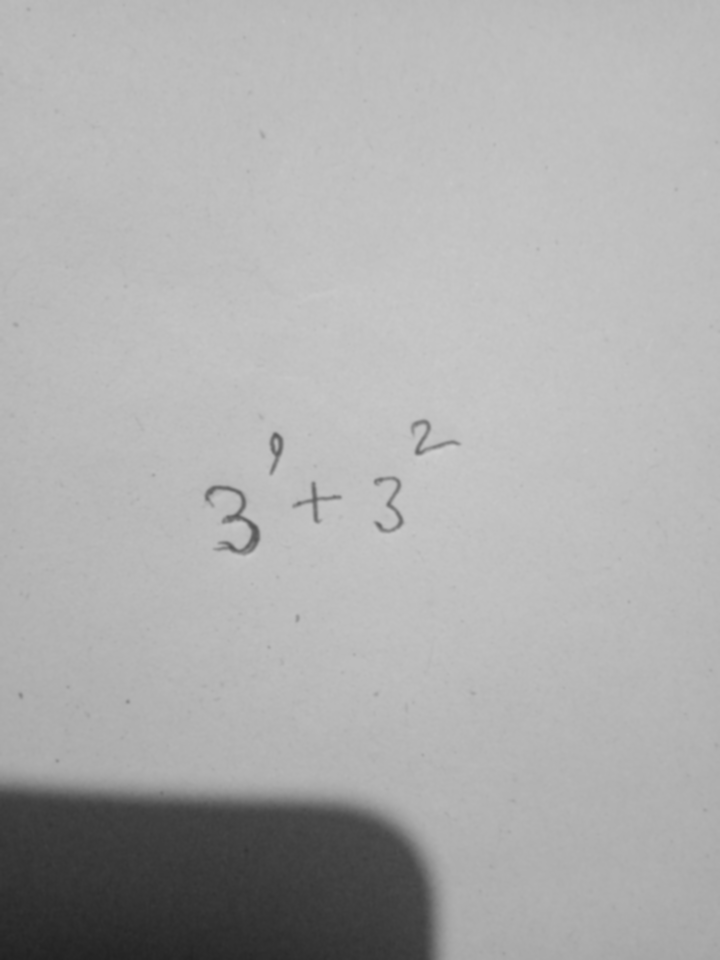

gray + blur:  []


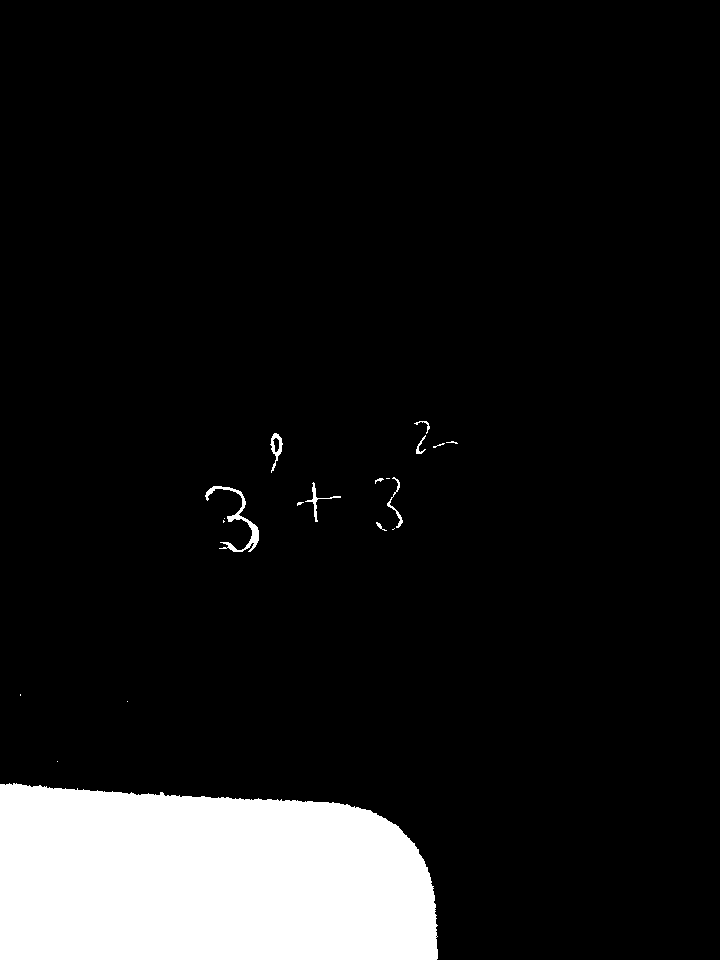

threshold + gray + resize:  ['ie', ')', 'N', 'owen']


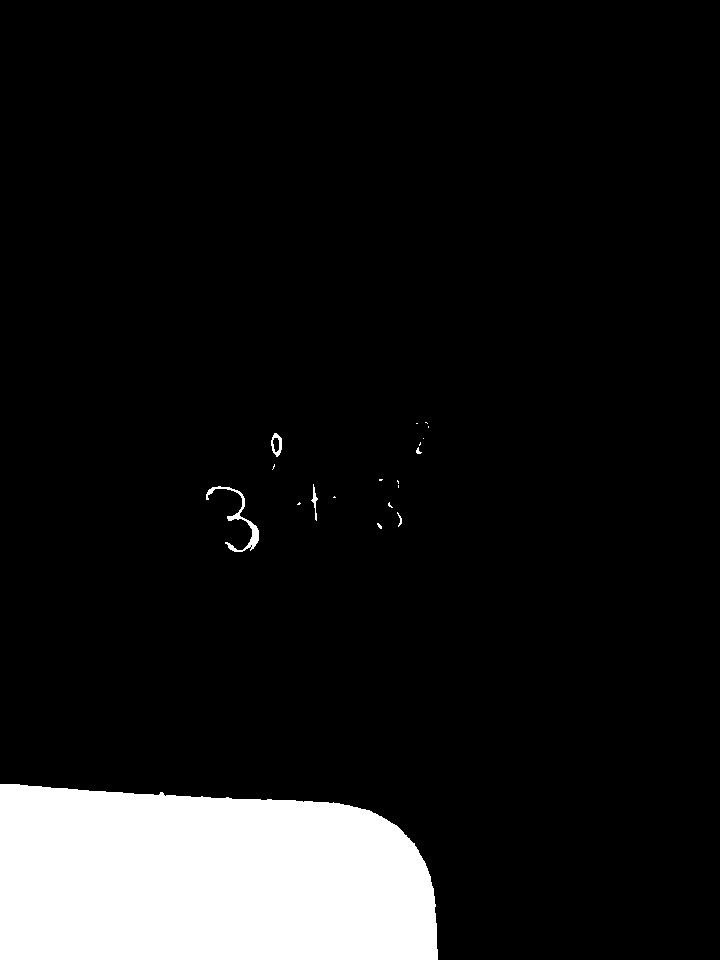

gray + blur + threshold:  []


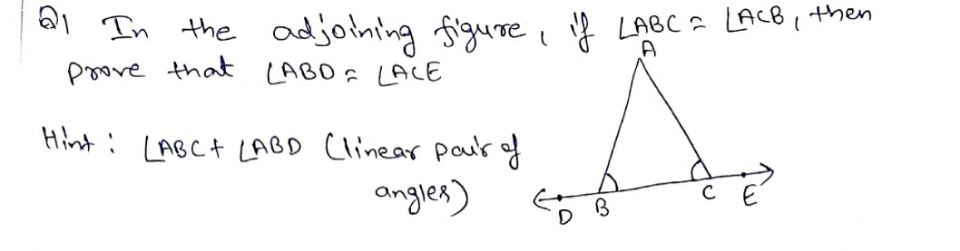

None:  ['|', '.', 'es', 'LECeiusaen', '[', '8', '\\', 'ay', 'she', 'odtolning', 'Agave', 'f', 'v', 'Lawe', 'Le', 'Prmve', 'thok', '(', 'ABOs', 'LACE', 'Wor', 'S', 'Lagct', '(', 'ASD', 'Ciinesn', 'peste', 'of', 'onghes', '’)', 'a', 'Ch', 'iG']


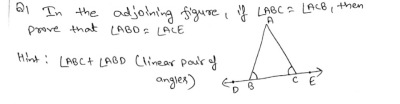

gray + resize:  ['BN', 'Tr', 'she', 'odlolnig', '4', '‘', '(', 'a', 'ee', 'mm', 'the', 'odlolntea', 'Figure', 'YP', 'Lage', 'e', 'Laer', 'pre', 'ok', 'eerie', 'ER', 'NW', '(', 'pect', 'AOD', 'CAtnear', 'pall', 'g', 'ong', ')', 'eg', 'EE']


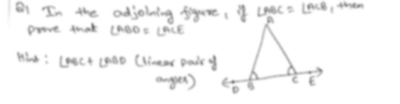

blur + gray + resize:  ['th', 'we', 'odjeltg', 'Arye', 'we', 'Pre', 'Amok', '(', 'MOO', 'e', 'UNE', 'vee', 'WEES', 'Lpece', 'UNO', 'CMienae', 'pede', '“™', 't']


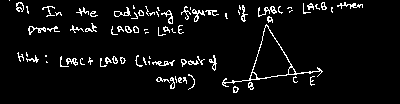

threshold + gray + resize:  ['ae', 'Ca', 'b', 'ed', 'anal', 'nthe', 'orbbolntag', 'Aigere', 'f', 'LAec', '>', 'LAMOr', 'ah', 'a', 'eet', 'e', '|', 'en', 'oe', 'eee']


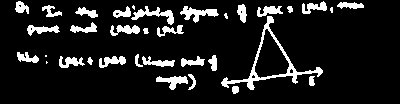

blur + threshold + gray + resize:  ['Dt', 'me', 'obpltg', 'Spe', 'Lot', 'nee', 'ee', 'Sete', ')', 'ai', 'a', 'Whe', ':', '(', 'pace', '1980', 'Lticnas', 'pede', 'a', ')', 't']


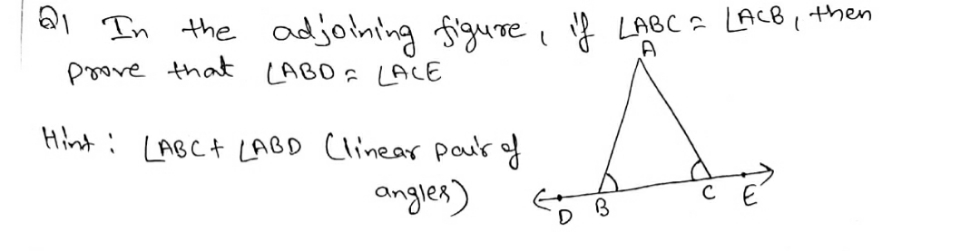

gray:  ['(', '2', 'Dy', 'athe', 'adsolning', 'Agave', '.', 'iene', 'Leseemas', 'Prmve', 'thek', '(', 'ABOs', 'LACE', 'ML', 'Lagct', '[', 'ABD', 'Citnear', 'poute', 'of', 'angler', '’)', '——', 's', 'Cc', '€']


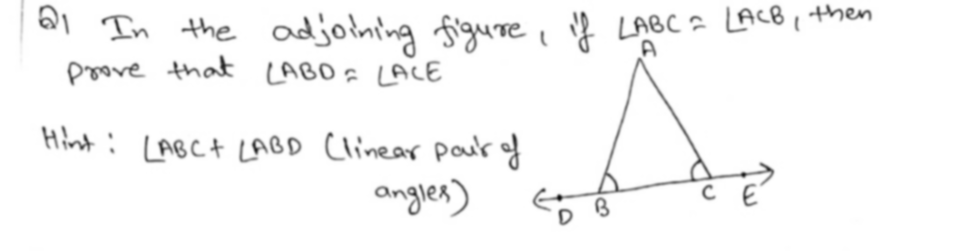

gray + blur:  ['18', ')', 'Ty', 'the', 'odjolntna', 'Aywre', '}', 'Laat', '>', 'LACB', ',', 'tren', 'Pwmve', 'tnok', '(', 'ABOs', 'LACE', 'Win', 'LAGCH', 'LAO', 'Ciimear', 'Posie', '4', 'Ongler', '’)', '&', '%', 'cE']


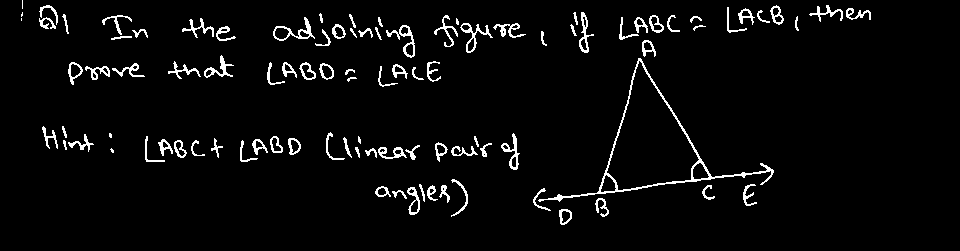

threshold + gray + resize:  ['a', 'ener', 'es', 'eR', 'Sy', 'are', 'ane', 'aes', 'Oe', 'a', 'ts', 'CLO', 'Na', 'an', 'Cor', 'NCO', 'eres', 'Pree', 'AD', ')', 'may', 'c', '€']


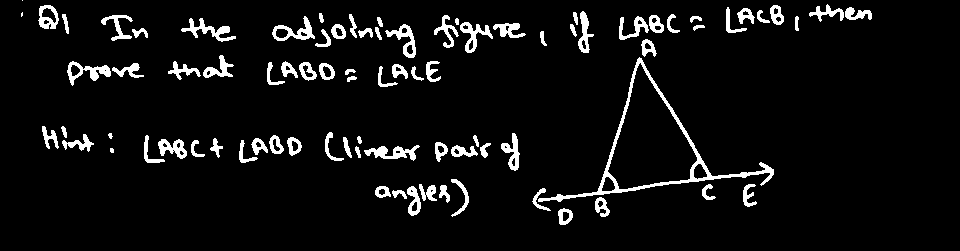

gray + blur + threshold:  ['ee', 'roe', 'RC', ']', 'ay', 'aoa', '3', 'ee', 'a', 'anda', 'Os', 'ar', 'EN', '8', 'as', 'Ele', 'eR', 'De', 'ey', 'van', 'Tt', 'r', 'caer', 'LD', 'és', 'ry', 'ars']


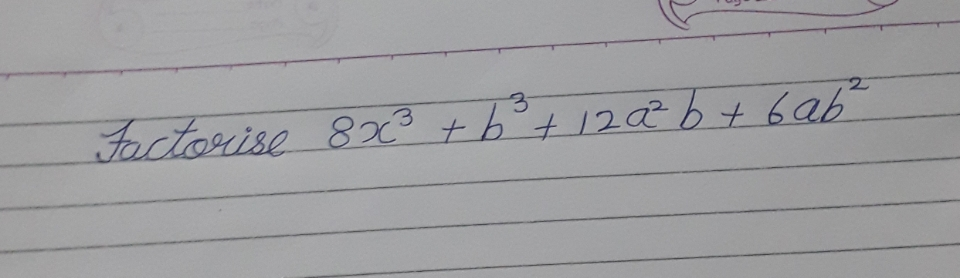

None:  ['SSS', '<', '3', 'exe', '+', 'h', '4', 'jae', 'bh', 'bab', 'Ee']


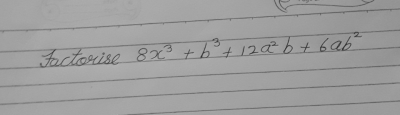

gray + resize:  []


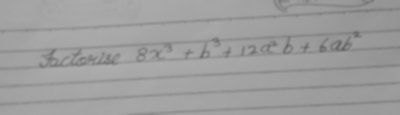

blur + gray + resize:  []


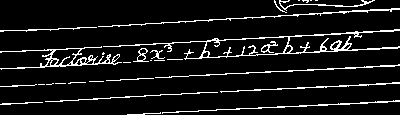

threshold + gray + resize:  []


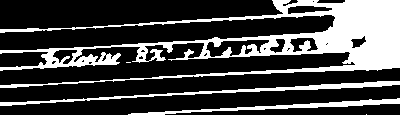

blur + threshold + gray + resize:  []


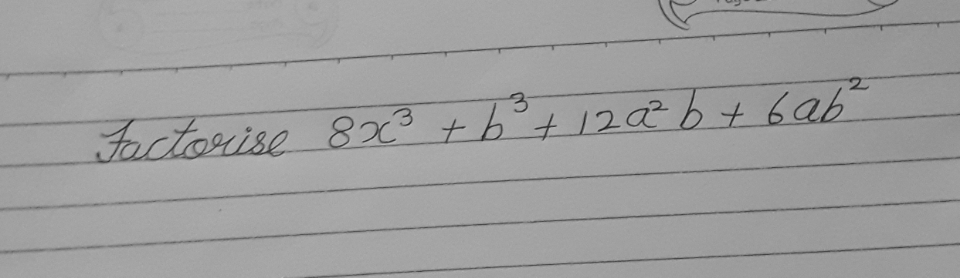

gray:  ['hisses', 'B2C', '-', '(', 'Ee']


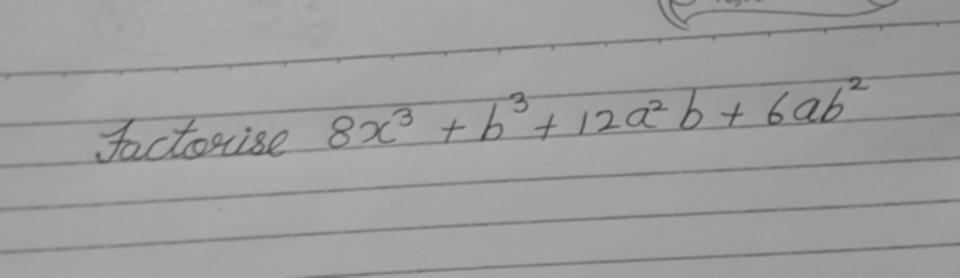

gray + blur:  ['Ni', 'ae', '°', 'wa', '———']


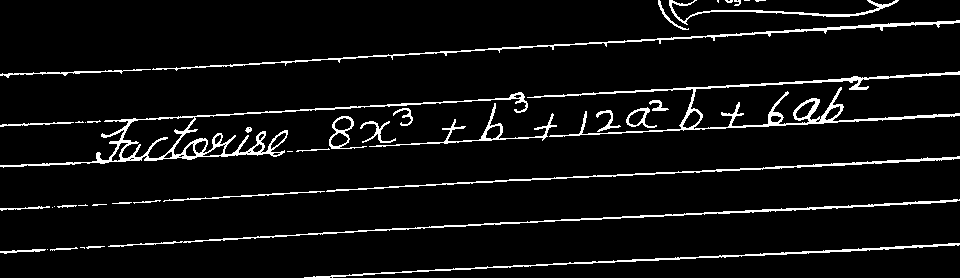

threshold + gray + resize:  ['hi', 'ciesiise', '825', '°', 'yee', 'ee']


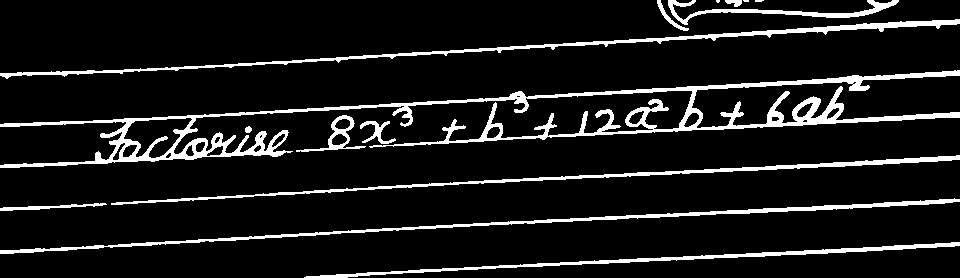

gray + blur + threshold:  ['Ve', 'A', '4', '—']


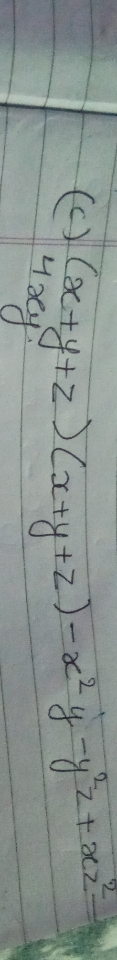

None:  []


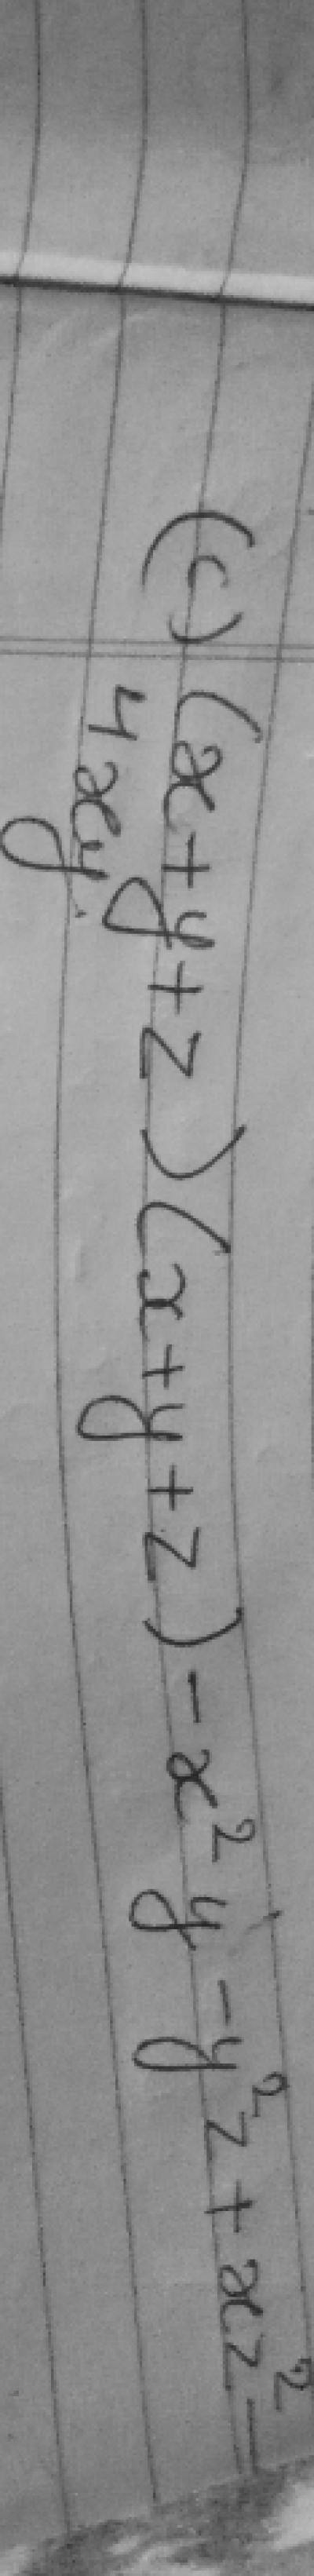

gray + resize:  []


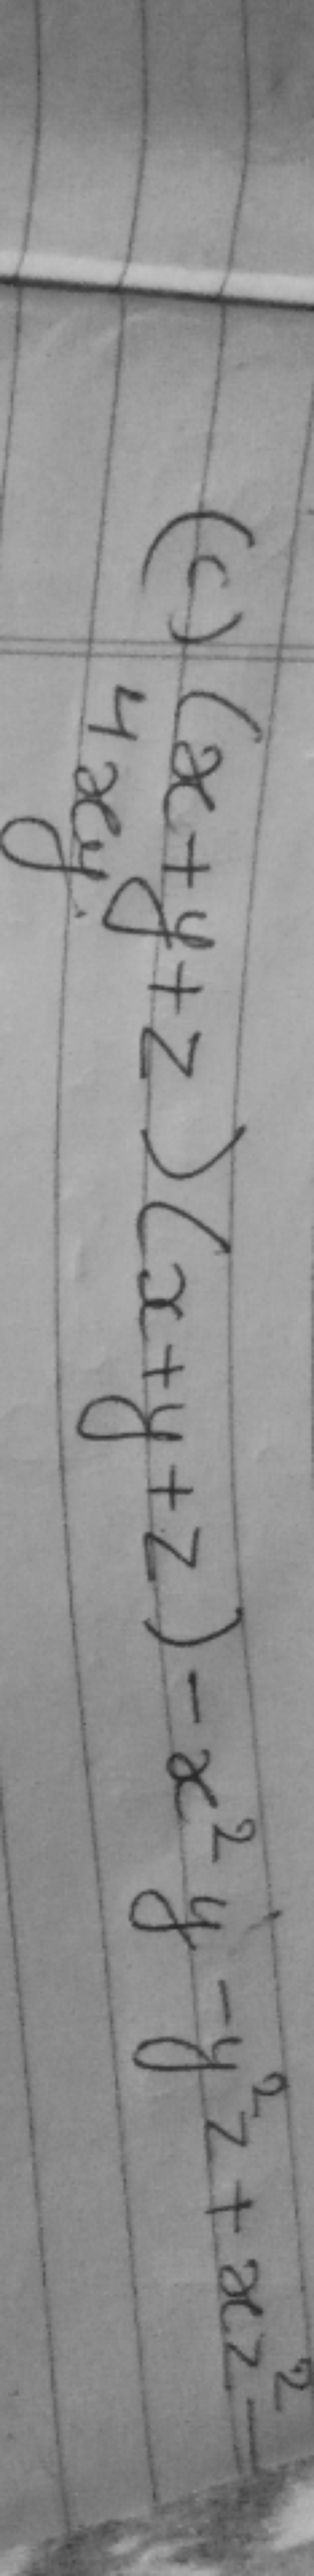

blur + gray + resize:  []


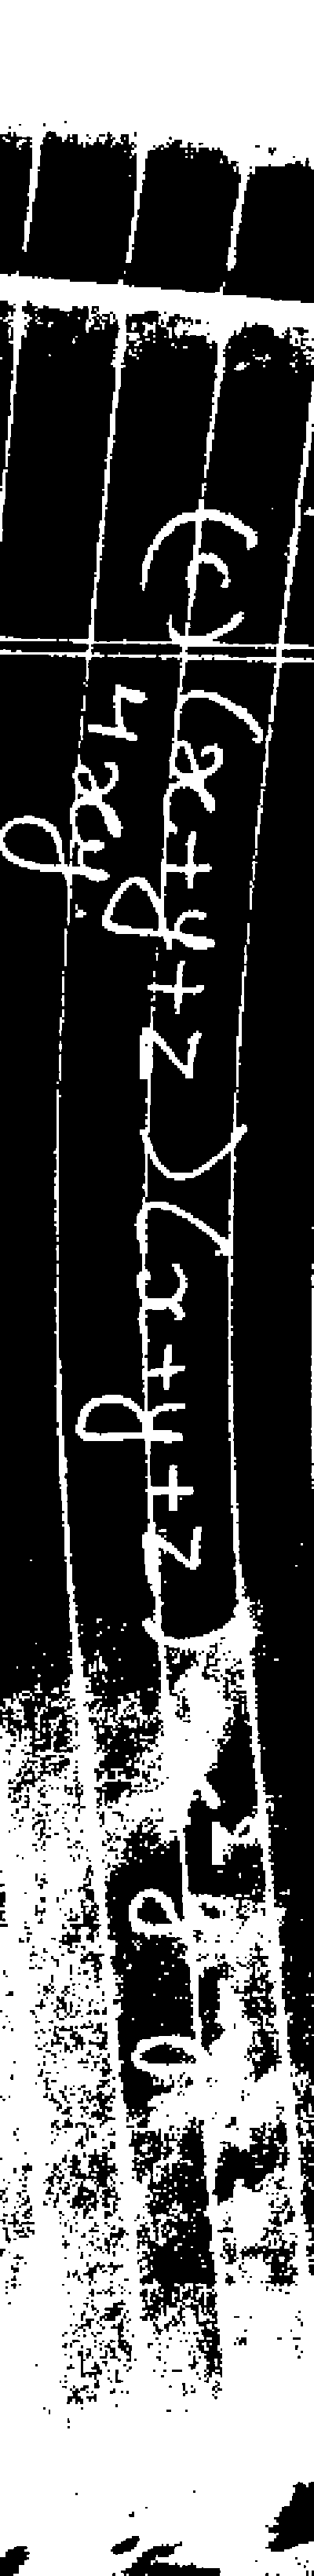

threshold + gray + resize:  []


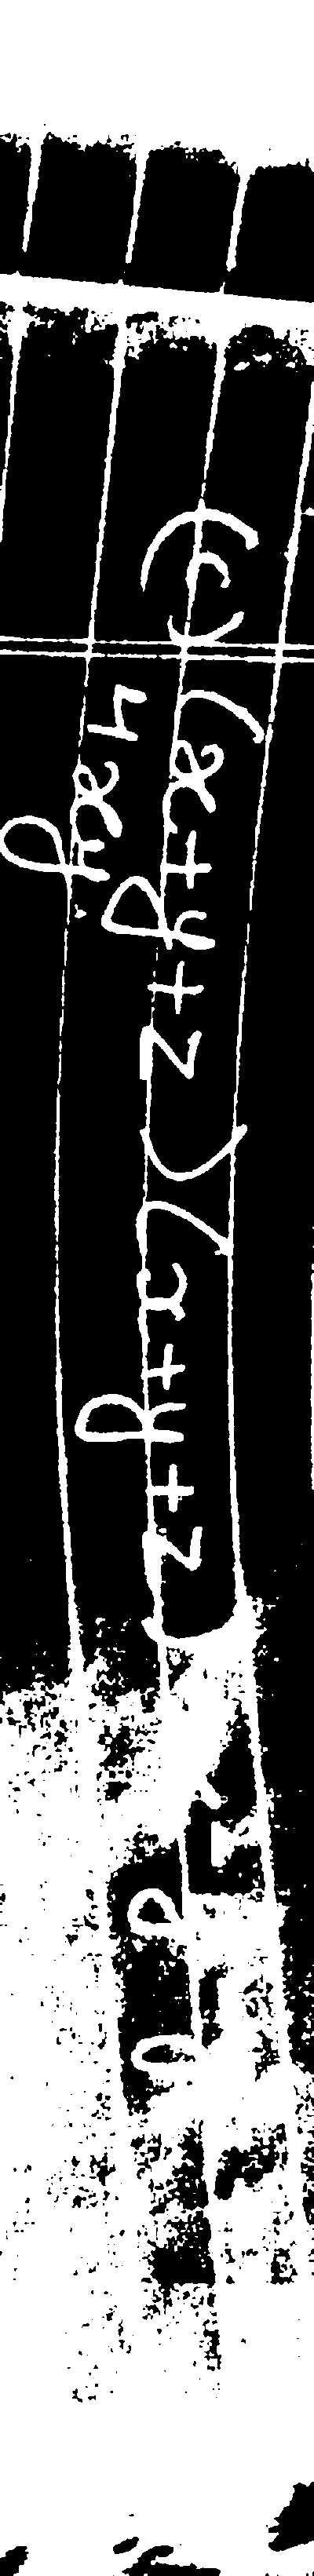

blur + threshold + gray + resize:  []


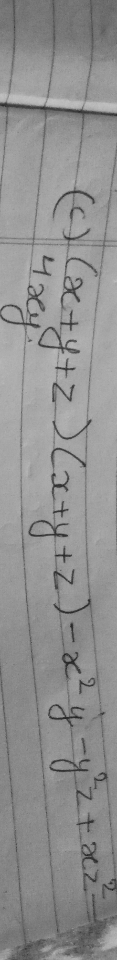

gray:  []


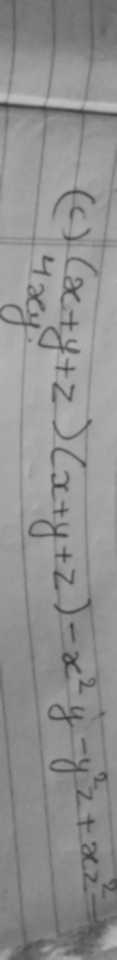

gray + blur:  []


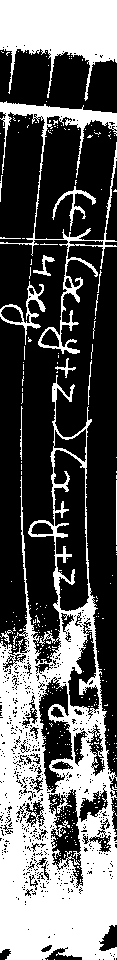

threshold + gray + resize:  []


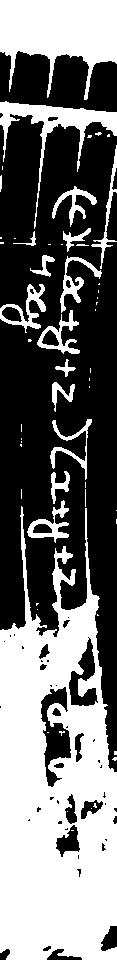

gray + blur + threshold:  []


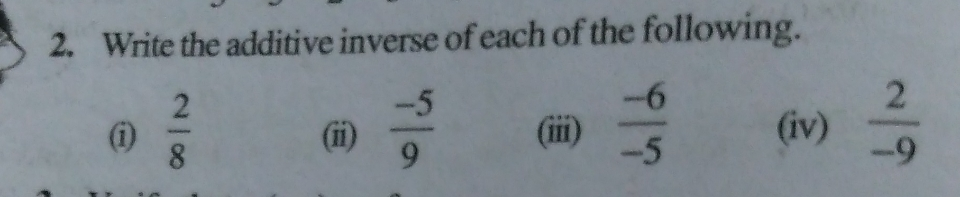

None:  ['S', '2', '.', 'Write', 'the', 'additive', 'inverse', 'of', 'each', 'of', 'the', 'following', '.', ';', 'Bt', '2', '@', '3', '%', '@®', '>', 'Gi', ')', '5', '(', 'iv', ')', '=', '9', 'de', ',', 'Mtn', 'ane']


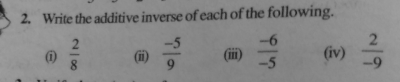

gray + resize:  ['\\', '2', 'Write', 'the', 'additive', 'inverse', 'of', 'each', 'of', 'the', 'following', '.', '>', '35', 'inset', 'ads', '0', '%', '®>', 'fae', '?']


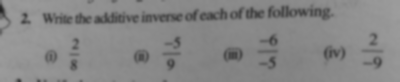

blur + gray + resize:  ['2', 'Wine', 'te', 'abtive', 'inven', 'of', 'each', 'ofthe', 'following', '.', '—', '6', '2', '@', 's', '™', '>']


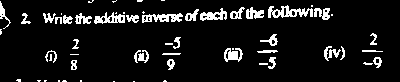

threshold + gray + resize:  ['s', '2', 'Write', 'the', 'additive', 'inverse', 'of', 'each', 'of', 'the', 'following', '.', '2', 'I', 'os', '=', 'Or', 'a', '>', 'a', ')']


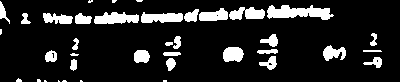

blur + threshold + gray + resize:  ['20', 'Tine', 'eeteten', 'teem', '=]', 'eT', '2', 'tt', 'Lo', ')']


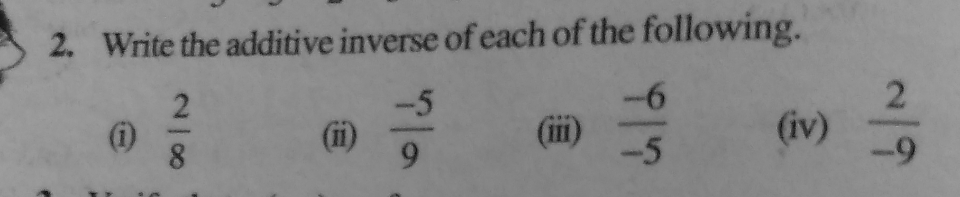

gray:  ['\\,', '2', '.', 'Wirt', 'the', 'additive', 'inverse', 'of', 'each', 'of', 'the', 'following', '.', 'al', 'pee', '2', '@', '5', '@', '>', 'Gi', ')', '5', '@)', '=', 'ie', '.', 'Mae', 'oe', 'rs', '_']


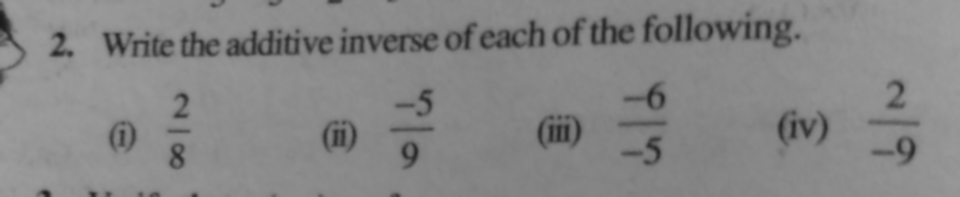

gray + blur:  [':', '2', '.', 'Write', 'the', 'additive', 'inverse', 'of', 'each', 'of', 'the', 'following', '.', ',', '2', 'os', '-', '6', ':', '3', '©', 'Fe', '=']


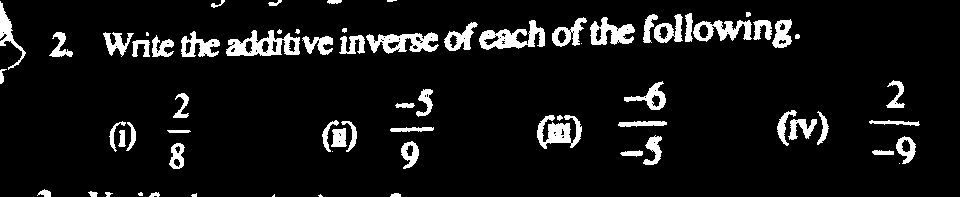

threshold + gray + resize:  ['Mena', 're', '5', 'ey', 'Or', '@', '5', '@', '=;', '7', 'ee', '7', 'a']


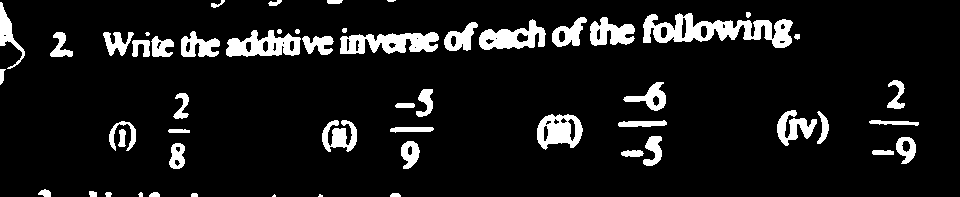

gray + blur + threshold:  [':', '2', '.', 'Write', 'the', 'additive', 'inverse', 'of', 'each', 'of', 'the', 'following', '.', 'J', 'P', '-', '5', 'ms', 'e', 'M3', 'i']


In [18]:
num = [3,4,5,11,13,14,21,28,29,32,40,42]
for j in num:
  i = '/content/drive/My Drive/OCR/TEST_OCR1/real_Test/text_image(take)/t'+str(j)+'.png'
  config = r'--oem 3 --psm 3 -c preserve_interword_spaces=1'
  img = cv2.imread(i)
  
  cv2_imshow(img)
  print("None: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(img, lang='eng', config=config)))


  gray1= cv2.cvtColor(imutils.resize(img, width=400), cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray1)
  print("gray + resize: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(gray1, lang='eng', config=config)))

  blur =  cv2.GaussianBlur(gray1, (5,5), 0)
  cv2_imshow(blur)
  print("blur + gray + resize: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(blur, lang='eng', config=config)))

  threshold = cv2.threshold(gray1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(threshold)
  print("threshold + gray + resize: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(threshold, lang='eng', config=config)))

  threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(threshold)
  print("blur + threshold + gray + resize: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(threshold, lang='eng', config=config)))

  gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray2)
  print("gray: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(gray2, lang='eng', config=config)))

  blur =  cv2.GaussianBlur(gray2, (5,5), 0)
  cv2_imshow(blur)
  print("gray + blur: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(blur, lang='eng', config=config)))

  threshold = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(threshold)
  print("threshold + gray + resize: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(threshold, lang='eng', config=config)))

  threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(threshold)
  print("gray + blur + threshold: ",WordPunctTokenizer().tokenize(pytesseract.image_to_string(threshold, lang='eng', config=config)))

